## Stage 1: Installing dependencies and notebook gpu setup

## Stage 2: Importing dependencies for the project

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10

%matplotlib inline
tf.__version__

'2.2.0-rc3'

## Stage 3: Dataset preprocessing

### Loading the Cifar10 dataset

In [0]:
#Setting class names for the dataset
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [0]:
#Loading the dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
X_train.shape

(50000, 32, 32, 3)

### Image normalization

In [0]:
X_train =  X_train / 255.0

In [0]:
X_test = X_test / 255.0

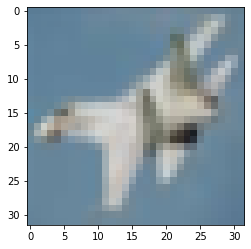

In [7]:
plt.imshow(X_test[10])

## Stage 4: Building a Convolutional neural network

### Defining the model

In [0]:
model = tf.keras.models.Sequential()

### Adding the first CNN Layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu
- input_shape: (32, 32, 3)


In [0]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu", input_shape=[32, 32, 3]))

### Adding the second CNN Layer and max pool layer

CNN layer hyper-parameters:
- filters: 32
- kernel_size:3
- padding: same
- activation: relu

MaxPool layer hyper-parameters:
- pool_size: 2
- strides: 2
- padding: valid

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
model.add(tf.keras.layers.Dropout(0.2))

In [0]:
model.add(tf.keras.layers.Conv2D(filters=256, kernel_size=3, padding="same", activation="relu"))

In [0]:
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2, padding='valid'))

In [0]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the Flatten layer

In [0]:
model.add(tf.keras.layers.Flatten())

### Adding the first Dense layer

Dense layer hyper-parameters:
- units/neurons: 128
- activation: relu

In [0]:
model.add(tf.keras.layers.Dense(units=1024, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dropout(0.2))

In [0]:
model.add(tf.keras.layers.Dense(units=256, activation='relu'))

In [0]:
model.add(tf.keras.layers.Dropout(0.2))

### Adding the second Dense layer (output layer)

Dense layer hyper-parameters:

 - units/neurons: 10 (number of classes)
 - activation: softmax


In [0]:
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 256)       590080    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 256)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 8, 8, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0

### Compiling the model

#### sparse_categorical_accuracy
sparse_categorical_accuracy checks to see if the maximal true value is equal to the index of the maximal predicted value.

https://stackoverflow.com/questions/44477489/keras-difference-between-categorical-accuracy-and-sparse-categorical-accuracy 

In [0]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam", metrics=["sparse_categorical_accuracy"])

### Training the model

In [23]:
history=model.fit(X_train, y_train, epochs=15, batch_size=128,validation_split=0.1)

Epoch 1/15
352/352 [==============================] - 8s 22ms/step - loss: 1.5484 - sparse_categorical_accuracy: 0.4360 - val_loss: 1.2186 - val_sparse_categorical_accuracy: 0.5830
Epoch 2/15
352/352 [==============================] - 7s 21ms/step - loss: 1.1707 - sparse_categorical_accuracy: 0.5828 - val_loss: 0.9977 - val_sparse_categorical_accuracy: 0.6550
Epoch 3/15
352/352 [==============================] - 7s 21ms/step - loss: 1.0078 - sparse_categorical_accuracy: 0.6434 - val_loss: 0.8853 - val_sparse_categorical_accuracy: 0.6924
Epoch 4/15
352/352 [==============================] - 7s 21ms/step - loss: 0.8847 - sparse_categorical_accuracy: 0.6877 - val_loss: 0.8543 - val_sparse_categorical_accuracy: 0.7064
Epoch 5/15
352/352 [==============================] - 7s 21ms/step - loss: 0.7802 - sparse_categorical_accuracy: 0.7252 - val_loss: 0.7801 - val_sparse_categorical_accuracy: 0.7388
Epoch 6/15
352/352 [==============================] - 7s 21ms/step - loss: 0.7001 - sparse_cate

### Model evaluation and prediction

In [24]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9770 - sparse_categorical_accuracy: 0.7398


In [25]:
print("Test accuracy: {}".format(test_accuracy))

Test accuracy: 0.739799976348877


In [26]:
print(history.history.keys())

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])


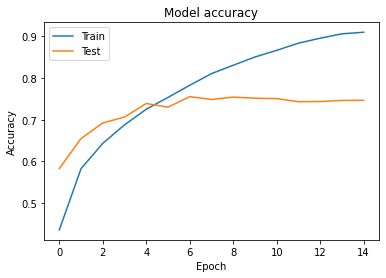

In [27]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


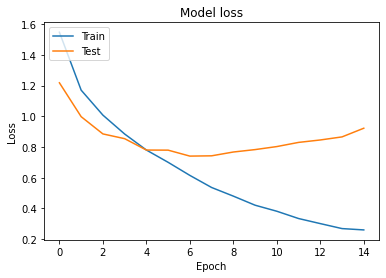

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()